# Analiza lige NBA
## Predstavitev podatkov
V spodnjem dokumentu bom s pomočjo tabel in grafov predstavil podatke iz košarkaške lige NBA za lansko sezono. Na podlagi njih bom pogledal ali lahko lahko z dovolj veliko gotovostjo delovne hipoteze zavrnem.
Podatke sem uvozil s pomočjo datotek `obdelava_podatkov.py` in `zajem_podatkov.py`. S pomočjo teh skript iz spletne strani [Basketball reference](https://www.basketball-reference.com/) poberem HTML datoteke, ki jih s pomočjo regularnih izrazov obdelam in zapišem v datoteki `players.csv` in `teams.csv`. Obe tabeli prikazujeta podatke statistik, ki jih posamezna ekipa ali pa igralec dosežejo na tekmo. 
Poleg tega sem še ročno uvozil še `teams_advanced.csv`, ki jo bom uporabil samo za informacije o zmagah in porazih v lanski sezoni. 

Datoteke prvo uvozimo s pomočjo pandas knjižnice.

In [2]:
import pandas as pd 

players = pd.read_csv("podatki/players.csv", index_col="id")
teams = pd.read_csv("podatki/teams.csv", index_col="team_id")
teams_standings = pd.read_csv("podatki/teams_advanced.csv")

Preverimo ali podatki izgledajo vredu.

In [3]:
players.head()

,player,position,team_id,fg,fga,trb,ast,stl,blk,tov,pts
id,,,,,,,,,,,
1,Precious Achiuwa,PF,MIA,2.0,3.7,3.4,0.5,0.3,0.5,0.7,5.0
2,Jaylen Adams,PG,MIL,0.1,1.1,0.4,0.3,0.0,0.0,0.0,0.3
3,Steven Adams,C,NOP,3.3,5.3,8.9,1.9,0.9,0.7,1.3,7.6
4,Bam Adebayo,C,MIA,7.1,12.5,9.0,5.4,1.2,1.0,2.6,18.7
5,LaMarcus Aldridge,C,SAS,5.5,11.8,4.5,1.7,0.4,0.9,1.0,13.7


In [4]:
players.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 623 entries, 1 to 540
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   player    623 non-null    object 
 1   position  623 non-null    object 
 2   team_id   623 non-null    object 
 3   fg        623 non-null    float64
 4   fga       623 non-null    float64
 5   trb       623 non-null    float64
 6   ast       623 non-null    float64
 7   stl       623 non-null    float64
 8   blk       623 non-null    float64
 9   tov       623 non-null    float64
 10  pts       623 non-null    float64
dtypes: float64(8), object(3)
memory usage: 58.4+ KB


In [5]:
teams.head()

,team,games,minutes_played,fg,fga,fg3,fga3,ft,fta,orb,drb,ast,stl,blk,tov,pf,pts
team_id,,,,,,,,,,,,,,,,,
MIL,Milwaukee Bucks,72.0,240.7,44.7,91.8,14.4,37.1,16.2,21.4,10.3,37.8,25.5,8.1,4.6,13.8,17.3,120.1
BRK,Brooklyn Nets,72.0,241.7,43.1,87.3,14.2,36.1,18.1,22.5,8.9,35.5,26.8,6.7,5.3,13.5,19.0,118.6
WAS,Washington Wizards,72.0,241.7,43.2,90.9,10.2,29.0,20.1,26.2,9.7,35.5,25.5,7.3,4.1,14.4,21.6,116.6
UTA,Utah Jazz,72.0,241.0,41.3,88.1,16.7,43.0,17.2,21.5,10.6,37.6,23.7,6.6,5.2,14.2,18.5,116.4
POR,Portland Trail Blazers,72.0,240.3,41.3,91.1,15.7,40.8,17.8,21.6,10.6,33.9,21.3,6.9,5.0,11.1,18.9,116.1


In [6]:
teams.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30 entries, MIL to CLE
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   team            30 non-null     object 
 1   games           30 non-null     float64
 2   minutes_played  30 non-null     float64
 3   fg              30 non-null     float64
 4   fga             30 non-null     float64
 5   fg3             30 non-null     float64
 6   fga3            30 non-null     float64
 7   ft              30 non-null     float64
 8   fta             30 non-null     float64
 9   orb             30 non-null     float64
 10  drb             30 non-null     float64
 11  ast             30 non-null     float64
 12  stl             30 non-null     float64
 13  blk             30 non-null     float64
 14  tov             30 non-null     float64
 15  pf              30 non-null     float64
 16  pts             30 non-null     float64
dtypes: float64(16), object(1)
memory usage:

In [7]:
teams_standings.head()

,Rk,Team,Age,W,L,PW,PL,MOV,SOS,SRS,...,FT/FGA,Unnamed: 22,eFG%.1,TOV%.1,DRB%,FT/FGA.1,Unnamed: 27,Arena,Attend.,Attend./G
0,1,Utah Jazz,28.5,52,20,55,17,9.25,-0.29,8.97,...,0.195,NaN,0.507,10.3,79.3,0.159,NaN,Vivint Smart Home Arena,151300.0,4203.0
1,2,Los Angeles Clippers,28.8,47,25,49,23,6.18,-0.16,6.02,...,0.186,NaN,0.531,11.9,79.1,0.186,NaN,STAPLES Center,13901.0,386.0
2,3,Phoenix Suns,26.6,51,21,49,23,5.82,-0.15,5.67,...,0.177,NaN,0.534,12.4,78.5,0.194,NaN,Phoenix Suns Arena,104027.0,2890.0
3,4,Milwaukee Bucks,28.1,46,26,48,24,5.89,-0.32,5.57,...,0.177,NaN,0.536,11.5,79.7,0.157,NaN,Fiserv Forum,64780.0,1799.0
4,5,Philadelphia 76ers,27.1,49,23,48,24,5.58,-0.31,5.28,...,0.225,NaN,0.521,13.8,78.2,0.200,NaN,Wells Fargo Center,68583.0,1905.0


Ker potrebujem samo stolpce z imenom ekipe, število zmag in porazov, ostale stolpce zbrišem. 

In [8]:
teams_standings = teams_standings[['Team', 'W', 'L']]
teams_standings.columns = ['team', 'w', 'l']
teams_standings.head()


,team,w,l
0,Utah Jazz,52,20
1,Los Angeles Clippers,47,25
2,Phoenix Suns,51,21
3,Milwaukee Bucks,46,26
4,Philadelphia 76ers,49,23


In [9]:
teams_standings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   team    30 non-null     object
 1   w       30 non-null     int64 
 2   l       30 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 848.0+ bytes


Zdaj bom še odstranil ime ekipe, saj je dovolj da naredim novo tabelo z id-ji in imeni ekip.

In [10]:
team_ids = teams['team'].copy()
teams = teams.drop("team", axis=1)
team_ids= team_ids.reset_index()
team_ids


,team_id,team
0,MIL,Milwaukee Bucks
1,BRK,Brooklyn Nets
2,WAS,Washington Wizards
3,UTA,Utah Jazz
4,POR,Portland Trail Blazers
5,PHO,Phoenix Suns
6,IND,Indiana Pacers
7,DEN,Denver Nuggets
8,NOP,New Orleans Pelicans
9,LAC,Los Angeles Clippers


V tabeli `teams_advanced` bom izbrisal ime ekipe in za indeksni stolpec nastavil id ekipe. Do imen lahko dostopam v ločeni tabeli zgoraj. 

In [11]:
teams_standings = teams_standings.merge(team_ids, how='left', on='team')
teams_standings = teams_standings.drop('team', axis=1)
teams_standings.set_index('team_id')


,w,l
team_id,,
UTA,52,20
LAC,47,25
PHO,51,21
MIL,46,26
PHI,49,23
DEN,47,25
BRK,48,24
LAL,42,30
DAL,42,30


# Vzorčna statistika ekip
V prvem delu analize si bom pogledal kakšen vpliv imajo osnovne statistike pri uspešnosti ekip. Spodnja tabela prikazuje povprečje, mediano in standardni odklon glavnih statistik tekme glede na vse ekipe.

In [12]:
teams.describe()[1:].round(2)

,games,minutes_played,fg,fga,fg3,fga3,ft,fta,orb,drb,ast,stl,blk,tov,pf,pts
mean,72.0,241.42,41.22,88.42,12.71,34.64,16.97,21.82,9.83,34.47,24.81,7.58,4.88,13.83,19.28,112.09
std,0.0,0.86,1.70,1.97,1.69,3.78,1.35,1.96,0.86,1.40,1.84,0.74,0.59,1.17,1.15,4.14
min,72.0,240.00,38.30,83.70,9.90,28.40,13.80,17.50,8.00,32.00,21.30,6.30,4.00,11.10,17.20,103.80
25%,72.0,240.70,39.75,87.22,11.38,31.50,16.25,20.95,9.33,33.52,23.70,7.00,4.40,13.20,18.55,109.50
50%,72.0,241.55,41.30,88.40,12.75,34.40,16.60,21.40,9.70,34.60,24.55,7.55,4.90,13.95,19.10,112.95
75%,72.0,242.10,42.58,89.20,13.80,37.08,17.55,22.48,10.50,35.30,26.68,8.05,5.20,14.68,20.20,114.98
max,72.0,242.80,44.70,91.80,16.70,43.00,20.10,26.20,11.70,37.80,27.70,9.10,6.40,16.10,21.60,120.10


Ker gledamo statistike ekip vidimo, da je razlika med kvartili zelo mala. Igralci v isti ekipi si med sabo 'porazdelijo' zgrešene in zadete mete, kot tudi vse ostale.

Spodnja tabela prikazuje maksimalne vrednosti glede na tekme, ter katera ekipa jih ima. 

In [13]:
max_teams = pd.concat([teams.idxmax(), teams.max()], axis=1)
max_teams = max_teams[1:]
max_teams.rename(columns={0: 'max_id', 1: 'max_value'})


,max_id,max_value
minutes_played,PHO,242.8
fg,MIL,44.7
fga,MIL,91.8
fg3,UTA,16.7
fga3,UTA,43.0
ft,WAS,20.1
fta,WAS,26.2
orb,NOP,11.7
drb,MIL,37.8
ast,GSW,27.7


V največ kategorijah vodi ekipa **Milwaukee Bucks**. Ta ekipa je lani zmagala prvenstvo. 

S pomočjo spodnjega grafa in zgornjih dve tabel lahko približno ocenim, če je katera statistična kategorija povezana z zmagovanjem.

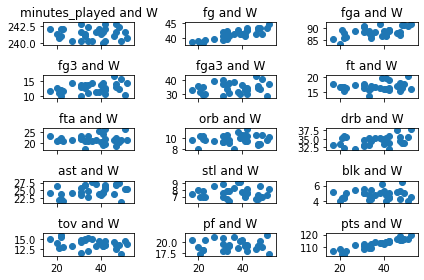

In [14]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

x = teams_standings['w']

fig, ax = plt.subplots(5, 3, sharex=True)
counter = 0
for vrstica in range(5):
    for stolpec in range(3):
        ax[vrstica, stolpec].set_title(f"{teams.columns[counter  + 1]} and W")
        ax[vrstica, stolpec].scatter(x, teams.iloc[:, counter + 1])
        counter += 1

fig.tight_layout()

plt.show()


Dva grafa rahlo izstopata. To je drugi graf v prvi vrstici in zadnji graf v zadnji vrstici. To sta statistiki zadetih metov in točk. Če premislimo natančneje ugotovimo, da je tudi to praktično ena statistika. Torej zadeti meti in točke sta močno povezani kategoriji. Zgornji grafi so namenjeni samo za občutek katere povezave gledati. Zato točk nisem označeval. 

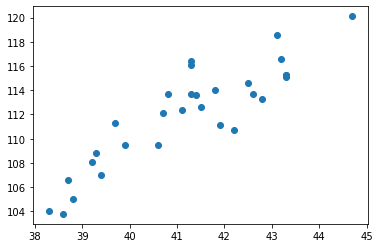

In [15]:
x = teams['fg']
y = teams['pts']

plt.scatter(x, y)
plt.show()

In [16]:
pts_fg_corr = teams['fg'].corr(teams['pts'])
pts_fg_corr

0.8891637965781941

Kot vidimo je med njima res močna povezava. Vsakomur, ki pozna pravila košarke je je jasno, da za zmago na tekmi potrebuješ čimveč zadetih metov. Ker je to praktično očitno, mi ta podatek pove več o pravilnosti podatkov, kot pa dejansko o vzorcih zmagovanja v košarki. V resnici, če bi bili vsi meti iz igre vredni isto število točk, sta ti dve statistki linearno povezani.

Opazimo tudi da ekipa, ki ima največ zadetih metov, največ meče. Na vrhu so v 3 kategorijah (so v 4, vendar zaradi zgornje povezave eno odštejem). Mogoče pa je recept za osvojitev prvenstva, da si na vrhu v več kategorijah kot katerakoli druga ekipa? 

V druge grafe se ne bom spuščal. Noben od ostalih ne izstopa in nimam razloga, da trdim da vidim vzorec, kjer ga zelo verjetno ni.

Spodaj si bom pogledal še povezave med posamičnimi kategorijami.

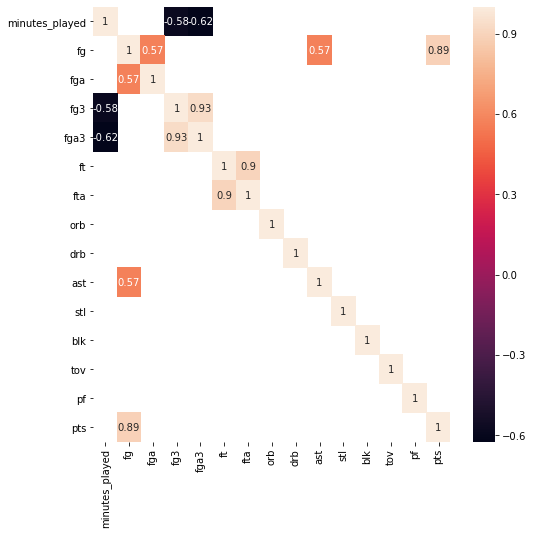

In [17]:
import seaborn as sns
corr = teams.iloc[:, 1:].corr()
corr = corr[abs(corr) > 0.5]

plt.figure(figsize=(8,8))
ax = sns.heatmap(corr, annot=True)
plt.show()


Na tem grafu so mogoče zanimive **3 povezave**. Korelacija med zadetimi meti in vsemi meti je očitna. Bolj zanimiva je zelo rahla povezava med asistencami in zadetimi meti, kot tudi povezava med zadetimi meti za 3 in minutami igre. 

Prva povezava je opomnik, da je košarka ekipni šport in je pomembno, da sodelujemo s svojimi soigralci. Druga povezavo si interpretiram, da ekipe, ki igrajo v povprečju dlje časa, večkrat igrajo podaljške, kjer so bolj pazljivi pri metih. Seveda pa tega nemorem z zagotovostjo trditi.

Ker zgornja analiza ni povedala kako zmagovati, si bom spodaj ogledal kako statistike vplivajo na poraze. 'Anti nasveti' (kaj ne delati) so veliko bolj robustni kot 'recepti za zmago'. Nesmiselno je da si ogledujem grafe kjer na x os vstavljam poraze. Tekem je vedno 72 in če vemo koliko smo jih zmagali potem točno vemo koliko smo jih izgubili.

Raje bi si ogledal kaj spodnja polovica ekip dela slabše kot zgornja. Za vsako od kategorij si bom ogledal spodnjih 15 ekip in zgornjih 15 ekip (razvrščene po zmagah/porazih).

TODO ali se sploh splača gledat spodnje ekipe, saj imam korelacije

# Vzorčna statistika igralcev
V spodnjem delu analize si bom ogledal statistike igralcev. Zanima me tudi ali v ekipah obstaja par ključnih igralcev, statistike ostalih pa so zanemarljive pri zmagovanju. Zavedam se, da ob analiziranju teh statistik dobim le neko grobo predstavo kaj se dogaja. Seveda je veliko tudi v tem kako igralci po ekipah razumejo med sabo, kakšnega trenerja imajo in kakšen urnik tekem imajo. 

In [18]:
players.describe()

,fg,fga,trb,ast,stl,blk,tov,pts
count,623.000000,623.000000,623.000000,623.000000,623.000000,623.000000,623.000000,623.000000
mean,3.123114,6.868218,3.550562,1.906902,0.605457,0.414125,1.059551,8.502087
std,2.223930,4.659546,2.368563,1.810429,0.397220,0.416878,0.813215,6.124321
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.400000,3.400000,1.850000,0.700000,0.300000,0.100000,0.500000,3.950000
50%,2.600000,5.800000,3.100000,1.300000,0.600000,0.300000,0.900000,7.200000
75%,4.300000,9.300000,4.700000,2.450000,0.900000,0.600000,1.400000,11.750000
max,9.900000,20.600000,14.300000,11.700000,2.100000,3.400000,5.000000,28.800000


V tem primeru so nekatere statistike veliko bolj zanimive. Še posebeje tiste z nizko standardno deviacijo. Vidimo da če želiš biti boljši kot 75% igralcev v ligi so zadosti že 3 asistence ali pa več kot 4 skoki. Te statistike so zelo zgoščene.

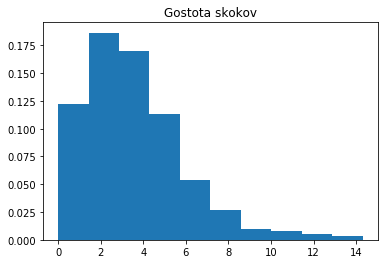

In [19]:
rebounds = players['trb']
ax = plt.hist(rebounds, density=True)
plt.title("Gostota skokov")
plt.show()

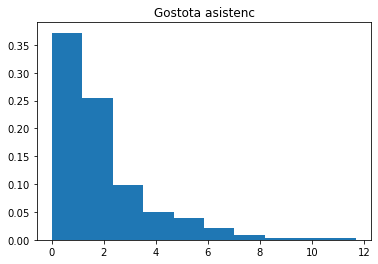

In [20]:
assists = players['ast']
ax = plt.hist(assists, density=True)
plt.title("Gostota asistenc")
plt.show()

Še posebej iz drugega grafa se nazorno vidi kako močno v levo je zamaknjeno povprečje. Še posebej pri skokih je očitno, da tisti ki so višji in več igrajo pod košem tudi poberejo veliko več oziroma večino skokov. 

Na tem mestu se mi zdi še bolj pomembno, da si ogledam korelacije med statistikami igralcev. Saj se nekatere lastnosti v ekipnih statistikah porazgubijo.

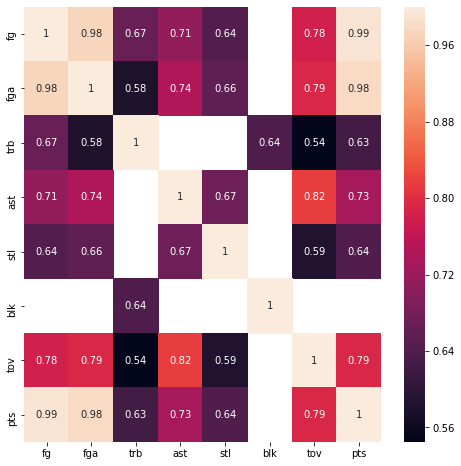

In [21]:
player_corr = players.iloc[:, :].corr()
player_corr = player_corr[abs(player_corr) > 0.5]

plt.figure(figsize=(8, 8))
ax = sns.heatmap(player_corr, annot=True)
plt.show()




Nekaj povezav, ki na prvi pogled izgledajo zanimivi v resnici niso. Število točk `pts` in število zadetih metov `fg` sta jasno močno povezana, kot sem že opisal zgoraj. Najbolj zanimiva povezava se mi zdi med asistencami `ast` in izgubljenimi žogami `tov`. 